# Simple Linear Regression using Python
In this notebook we will solve a Simple Linear Regression problem using Python programming language. In order to do this we will use some commonly used libraries for solving machine learning tasks, these includes Pandas, Numpy, Matplotlib and Scikit-learn.

## Task:
Suppose we are given some data for a company sales in a given year, and we are required to make a prediction of the sales of that company in a given year $x$. The data is illustrated on the table below:

| **year** | **sales** |
|----------|-----------|
| 2005     | 12        |
| 2006     | 19        |
| 2007     | 29        |
| 2008     | 37        |
| 2009     | 45        |

Our workflow for this task will involve the following:
1. Importing Libraries for our task
2. Reading the data from the provided file
3. Exploring the data 
4. Splitting the data into training and test sets
5. Building the model to fit the training data
6. Using the model to make predictions for the test data set 
7. Evaluating our model performance

### Step 1: Importing Libraries for our task
We shall start the process by importing the necessary libraries which are:
- **Pandas:** a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.
- **Numpy:**  a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate n these arrays.
- **Matplotlib:** a comprehensive library for creating static, animated, and interactive visualizations in Python.
- **Scikit-learn:** an open source data analysis library, and the gold standard for Machine Learning (ML) in the Python ecosystem.


In [18]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

### 2. Reading the data from the provided file
Since the data is in a CSV format, we are going to read this file using the pandas's read_csv method

In [19]:
df = pd.read_csv('dataset/01-sales_dataset.csv')

### 3. Exploring the data 
Let us explore the data by examining it's shape, summary on its continuous variables.

We shall start by using the **shape** attribute of our data which outputs just a tuple of (rows,
columns)

In [20]:
df.shape

(5, 2)

Then we shall view the first few records present in our dataset using the **head()** method

In [21]:
df.head()

,year,sales
0,2005,12
1,2006,19
2,2007,29
3,2008,37
4,2009,45


Then we shall describe the data using the **describe()** method to get the summary of continuous variables

In [22]:
df.describe()

,year,sales
count,5.000000,5.000000
mean,2007.000000,28.400000
std,1.581139,13.296616
min,2005.000000,12.000000
25%,2006.000000,19.000000
50%,2007.000000,29.000000
75%,2008.000000,37.000000
max,2009.000000,45.000000


We are starting to get more comfortable with our dataset, we can plot the data to see how it looks like, for this we are going to use the Pandas DataFrame plot method, to atleast see if there is any correlation between the Year and Sales.

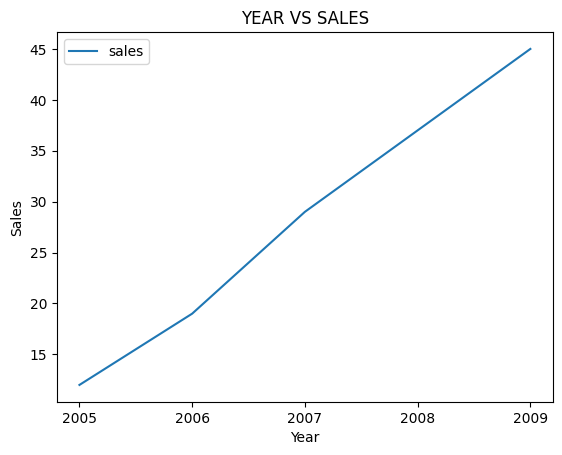

In [23]:
df.plot(x='year', y='sales')
plt.title('YEAR VS SALES')
plt.xticks(np.arange(min(df['year']), max(df['year'])+1, 1.0))
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

### 4. Splitting the data into training and test sets
We are going to split our data into training and test sets using the **train_test_split()** function we've imported from the Scikit-Learn library. We will start by slicing our data to obtain features input ($x$) and label ($y$). In other words features are the independent variables while labels are dependent variables whose values are to be predicted. 

In our dataset we only have two columns. We want to predict the company sales depending upon the year. Therefore our features set will consist of the “Year” column, and the label will be the “Sales” column.


The features are stored in the $X$ variable, we specified “-1” as the range for columns since we wanted our feature set to contain all the columns except the last one, which is “Sales”.

Similarly the $y$ variable contains the labels. We specified “1” for the label column since the index for “Sales” column is 1.


Then we input these two variables to the **train_test_split()** function.

Take note of the test_size parameter and random_state parameter used in the function call.

In [24]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

### 5. Building the model to fit the training data
We are going to fit our model to the training data by using the LinearRegression() module we've imported from the Scikit-learn

In [26]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

### 6. Using the model to make predictions for the test data set 
After fitting the model we can use it to make some predictions on the test data, this will be usefull during the evaluation phase of our model. 

We can also display the model's parameters i.e. $w$ and $b$ thus formulate the equation representing our model:
$f_{w,b}(x) = wx + b$

In [27]:
y_pred = model.predict(X_test)

In [28]:
print(f'b = {model.intercept_}')
print(f'w = {model.coef_}')

b = -16744.0
w = [8.35714286]


Thus the equation of our model equation becomes:

$f(x) = 8.36x-1.67$

We can plot this model equation on a scatter plot in order to visualize how well it fits our dataset. This can be one of the first steps towards evaluating the performance of our model.

In order to create this plot, we are going to use our model to make predictions for all the $X$ (features) in our dataset, and then we will plot this in the canvas containing the scatter plot for our dataset.

Text(0, 0.5, 'Sales')

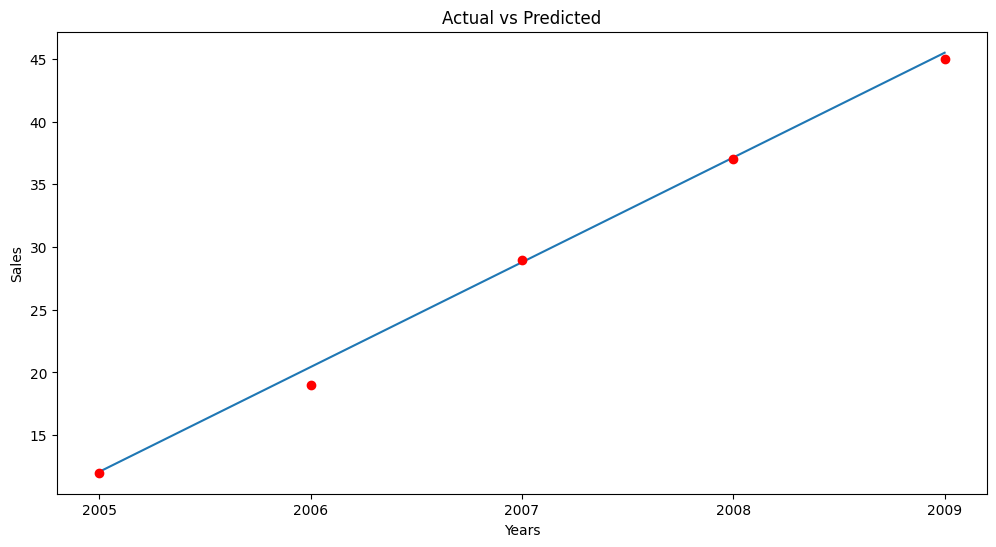

In [29]:
all_y_pred = model.predict(X)
plt.figure(figsize=(12, 6))
plt.plot(X, all_y_pred) # Regression line
plt.plot(X, y, 'ro') # Scatter plot showing actual data
plt.title('Actual vs Predicted')
plt.xticks(np.arange(min(X), max(X)+1, 1.0))
plt.xlabel('Years')
plt.ylabel('Sales')

### 7. Evaluating our model performance
We can  evaluate our model by displaying some important metrics. In this case we will  use the **Mean Squared Error** and **Coefficient of determination**. 

This is done by importing the **mean_squared_error** and **r2_score** functions from the **sklearn.metrics** module of the Scikit-Learn library.

#### The Coefficent of determination $(R^2)$
This measures how well a statistical model predicts an outcome. The outcome is represented by the model’s dependent variable.

The lowest possible value of $(R^2)$ is 0 and the highest possible value is 1. 

Put simply, the better a model is at making predictions, the closer its $(R^2)$ will be to 1.

#### Mean square error (MSE) 

This measures the amount of error in statistical models. It assesses the average squared difference between the observed and predicted values.

When a model has no error, the MSE equals zero, as model error increases, its value increases.

The mean squared error is also known as the mean squared deviation (MSD).


In [30]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Mean squared error: 1.15
Coefficient of determination: 0.99


## Task:

![alt text](img/restaurant_kfc.jpg "Restaurant")

Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has restaurants in various cities and you have data for profits and populations from the cities. You would like to use this data to help you select which city to expand to next.

The dataset is contained in the file **dataset/01-profits_and_populations.csv**. The first column is the population of a city and the second column is the profit of a food truck in that city (a negative value for profit indicates a loss). 

Create a model that will project the profits of establishing a restaurant in a given restaurant in a city with a given population to help you in the decision making process.